In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Suppress warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
filepath = '/kaggle/input/icr-identify-age-related-conditions'
df_train = pd.read_csv(os.path.join(filepath, 'train.csv'), index_col=[0])
df_test = pd.read_csv(os.path.join(filepath, 'test.csv'), index_col=[0])
greeks = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/greeks.csv')

df_train['EJ'] = df_train['EJ'].replace({'A': 0, 'B': 1})
df_test['EJ']  = df_test['EJ'].replace({'A': 0, 'B': 1})

data = pd.concat([df_train, greeks.set_index('Id')], axis=1)
target_col = 'Class'

In [3]:
df_train

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
Id,,,,,,,,,,,,,,,,,,,,,
000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,4157.68439,...,0.173229,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000,0
fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,5654.07556,...,10.223150,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340,0
fd8ef6377f76,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,5888.87769,...,0.173229,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000,0


In [4]:
df_train.isnull().sum().sort_values(ascending=False).head(10)

EL    60
BQ    60
CC     3
CB     2
FS     2
FL     1
FC     1
DU     1
GL     1
EE     0
dtype: int64

In [5]:
# Sütun adları listesi
sutunlar = ['EL', 'BQ', 'CC', 'CB', 'FS', 'FL', 'FC', 'DU', 'GL']

# Eksik değerleri sütunların ortalamalarıyla doldurma
for sutun in sutunlar:
    sutun_ortalama = df_train[sutun].mean()
    df_train[sutun].fillna(sutun_ortalama, inplace=True)

In [6]:
df_train['EL'].sort_values(ascending=False)

Id
7b8cda4bc33e    109.125159
5d694ba9aa16    109.125159
69e627ec5d3e    109.125159
dc9b175cbf1e    109.125159
dd3515028d71    109.125159
                   ...    
661b3a326a9d     10.506210
b2b3ec04caf6      8.603595
13ef6c55286a      7.522944
cc42ed28ac3f      6.912477
810ff5afd0e2      5.394675
Name: EL, Length: 617, dtype: float64

In [7]:
print(df_train["EL"].mean())
print(df_train['BQ'].mean())
print(df_train['CC'].mean())
print(df_train['CB'].mean())
print(df_train['FS'].mean())
print(df_train['FL'].mean())
print(df_train['FC'].mean())
print(df_train['DU'].mean())
print(df_train['GL'].mean())

69.58259579622981
98.32873688509875
0.6888014997068405
77.10415084878048
0.42150086016260163
5.433198835689935
71.34152618181818
1.802900432142857
8.530960818952922


## Train_test mevzusu

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Özellikler (X) ve etiketler (y) ayrımı
X = df_train.drop('Class', axis=1)
y = df_train['Class']

# Train ve test veri kümesine ayırma (örneğin, %80 train, %20 test olarak ayırıyoruz)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standartlaştırma
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Sınıf ağırlıklarını belirleme (örneğin, 0 sınıfı için 0.25, 1 sınıfı için 0.75)
class_weights = {0: 0.25, 1: 0.75}

# Random Forest modeli oluşturma ve eğitme
rf_model = RandomForestClassifier(class_weight=class_weights, n_estimators=100)
rf_model.fit(X_train_std, y_train)

# Logistic Regression modeli oluşturma ve eğitme
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_std, y_train)

# SVM modeli oluşturma ve eğitme
svc_model = SVC(class_weight=class_weights, probability=True)
svc_model.fit(X_train_std, y_train)

# Gradient Boosting modeli oluşturma ve eğitme
grad_boost_model = GradientBoostingClassifier()
grad_boost_model.fit(X_train_std, y_train)

# Model performansını ölçme
models = {
    'Random Forest': rf_model,
    'Logistic Regression': log_reg_model,
    'SVM': svc_model,
    'Gradient Boosting': grad_boost_model
}

for name, model in models.items():
    y_pred = model.predict(X_test_std)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC AUC Score: {roc_auc:.4f}")

# Ensemble modeli oluşturma
ensemble_model = VotingClassifier(estimators=[
    ('Random Forest', rf_model),
    ('Logistic Regression', log_reg_model),
    ('SVM', svc_model),
    ('Gradient Boosting', grad_boost_model)
], voting='soft') # 'soft' oylama, tahminlerin olasılıklarının ortalama alınmasıdır

# Ensemble modelini eğitme
ensemble_model.fit(X_train_std, y_train)

# Ensemble modelini test veri kümesi üzerinde değerlendirme
y_pred_ensemble = ensemble_model.predict(X_test_std)
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
precision_ensemble = precision_score(y_test, y_pred_ensemble)
recall_ensemble = recall_score(y_test, y_pred_ensemble)
f1_ensemble = f1_score(y_test, y_pred_ensemble)
y_prob_ensemble = ensemble_model.predict_proba(X_test_std)[:, 1]
roc_auc_ensemble = roc_auc_score(y_test, y_prob_ensemble)

# Sonuçları ekrana yazdırma
print("Ensemble Model - Accuracy:", accuracy_ensemble)
print("Ensemble Model - Precision:", precision_ensemble)
print("Ensemble Model - Recall:", recall_ensemble)
print("Ensemble Model - F1 Score:", f1_ensemble)
print("Ensemble Model - ROC AUC Score:", roc_auc_ensemble)

Random Forest - Accuracy: 0.9355, Precision: 1.0000, Recall: 0.6522, F1 Score: 0.7895, ROC AUC Score: 0.8261
Logistic Regression - Accuracy: 0.8871, Precision: 0.7143, Recall: 0.6522, F1 Score: 0.6818, ROC AUC Score: 0.7964
SVM - Accuracy: 0.8629, Precision: 0.6250, Recall: 0.6522, F1 Score: 0.6383, ROC AUC Score: 0.7815
Gradient Boosting - Accuracy: 0.9355, Precision: 0.8571, Recall: 0.7826, F1 Score: 0.8182, ROC AUC Score: 0.8765
Ensemble Model - Accuracy: 0.9274193548387096
Ensemble Model - Precision: 0.9375
Ensemble Model - Recall: 0.6521739130434783
Ensemble Model - F1 Score: 0.7692307692307693
Ensemble Model - ROC AUC Score: 0.9767541971588464


## Bu kısımda ikinci part toggle'ını oluşturdum.

Random Forest - Accuracy: 0.9435, Precision: 1.0000, Recall: 0.6957, F1 Score: 0.8205, ROC AUC Score: 0.8478
Logistic Regression - Accuracy: 0.8871, Precision: 0.7143, Recall: 0.6522, F1 Score: 0.6818, ROC AUC Score: 0.7964
SVM - Accuracy: 0.8629, Precision: 0.6250, Recall: 0.6522, F1 Score: 0.6383, ROC AUC Score: 0.7815
Gradient Boosting - Accuracy: 0.9355, Precision: 0.8571, Recall: 0.7826, F1 Score: 0.8182, ROC AUC Score: 0.8765


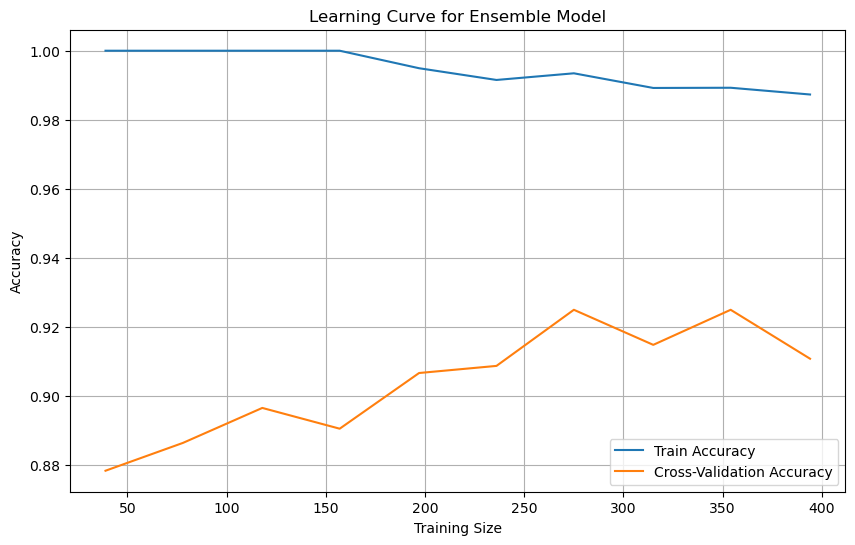

In [9]:
# Üstteki kodun aynısıdı baro sadece birkaç özellik eklettirdim.
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Özellikler (X) ve etiketler (y) ayrımı
X = df_train.drop('Class', axis=1)
y = df_train['Class']

# Train ve test veri kümesine ayırma (örneğin, %80 train, %20 test olarak ayırıyoruz)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standartlaştırma
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Sınıf ağırlıklarını belirleme (örneğin, 0 sınıfı için 0.25, 1 sınıfı için 0.75)
class_weights = {0: 0.25, 1: 0.75}

# Random Forest modeli oluşturma ve eğitme
rf_model = RandomForestClassifier(class_weight=class_weights, n_estimators=100)
rf_model.fit(X_train_std, y_train)

# Logistic Regression modeli oluşturma ve eğitme
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_std, y_train)

# SVM modeli oluşturma ve eğitme
svc_model = SVC(class_weight=class_weights, probability=True)
svc_model.fit(X_train_std, y_train)

# Gradient Boosting modeli oluşturma ve eğitme
grad_boost_model = GradientBoostingClassifier()
grad_boost_model.fit(X_train_std, y_train)

# Model performansını ölçme ve ekrana yazdırma
models = {
    'Random Forest': rf_model,
    'Logistic Regression': log_reg_model,
    'SVM': svc_model,
    'Gradient Boosting': grad_boost_model
}

for name, model in models.items():
    y_pred = model.predict(X_test_std)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    print(f"{name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC AUC Score: {roc_auc:.4f}")

# Cross-validation uygulama ve overfitting kontrolü
train_sizes, train_scores, test_scores = learning_curve(
    ensemble_model, X_train_std, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Ortalama cross-validation skorlarını hesaplama
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Grafiği çizdirme
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Train Accuracy')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Accuracy')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Ensemble Model')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Özellikler (X) ve etiketler (y) ayrımı
X = df_train.drop('Class', axis=1)
y = df_train['Class']

# Train ve test veri kümesine ayırma (örneğin, %80 train, %20 test olarak ayırıyoruz)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting modeli oluşturma ve eğitme
grad_boost_model = GradientBoostingClassifier(learning_rate=0.1, subsample=1.0, n_estimators=100,
                                              max_depth=3, min_samples_split=2, min_samples_leaf=1,
                                              max_features=None, random_state=42)
grad_boost_model.fit(X_train, y_train)

# Model performansını ölçme ve ekrana yazdırma
y_pred = grad_boost_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Gradient Boosting - Accuracy:", accuracy)
print("Gradient Boosting - Precision:", precision)
print("Gradient Boosting - Recall:", recall)
print("Gradient Boosting - F1 Score:", f1)
print("Gradient Boosting - ROC AUC Score:", roc_auc)

Gradient Boosting - Accuracy: 0.9354838709677419
Gradient Boosting - Precision: 0.8571428571428571
Gradient Boosting - Recall: 0.782608695652174
Gradient Boosting - F1 Score: 0.8181818181818182
Gradient Boosting - ROC AUC Score: 0.876452862677572


## Matrix

In [11]:
# Bunun daha iyi olacağını söylüyor. Diğerini sildim.

def balanced_log_loss(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1-1e-15)
    nc = np.bincount(y_true)
    w0, w1 = 1 / (nc[0] / y_true.shape[0]), 1 / (nc[1] / y_true.shape[0])
    balanced_log_loss_score = -((w0 * np.sum((y_true == 0) * np.log(1 - y_pred))) + (w1 * np.sum((y_true != 0) * np.log(y_pred)))) / (w0 + w1)
    return balanced_log_loss_score


In [12]:
import optuna

# Define the search space for weights
def objective(trial):
    w0 = trial.suggest_uniform('w0', 0.1, 1.0)
    w1 = 1 - w0

    # Calculate the weighted prediction
    weighted_prediction = w0 * rf_model.predict_proba(X_test_std)[:, 1] + \
                          w1 * log_reg_model.predict_proba(X_test_std)[:, 1] + \
                          w1 * svc_model.predict_proba(X_test_std)[:, 1] + \
                          w1 * grad_boost_model.predict_proba(X_test_std)[:, 1]

    # Clip the predictions to avoid numerical instability
    weighted_prediction = np.clip(weighted_prediction, 1e-15, 1 - 1e-15)

    # Calculate balanced log loss score for the weighted prediction
    balanced_log_loss_score = balanced_log_loss(y_test, weighted_prediction)

    return balanced_log_loss_score

# Optimize the weights
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Get the best weights
best_w0 = study.best_params['w0']
best_w1 = 1 - best_w0

# Calculate the final weighted prediction
final_weighted_prediction = best_w0 * rf_model.predict_proba(X_test_std)[:, 1] + \
                            best_w1 * log_reg_model.predict_proba(X_test_std)[:, 1] + \
                            best_w1 * svc_model.predict_proba(X_test_std)[:, 1] + \
                            best_w1 * grad_boost_model.predict_proba(X_test_std)[:, 1]

# Calculate the balanced log loss score for the final weighted prediction
final_balanced_log_loss_score = balanced_log_loss(y_test, final_weighted_prediction)

print("Best Weights: w0 =", best_w0, ", w1 =", best_w1)
print("Final Balanced Log Loss Score:", final_balanced_log_loss_score)


[I 2023-07-24 14:56:13,059] A new study created in memory with name: no-name-cb7fdf20-070d-4d25-94f0-ca7d83dfe794
[I 2023-07-24 14:56:13,085] Trial 0 finished with value: 11.203440688371167 and parameters: {'w0': 0.6612993976177782}. Best is trial 0 with value: 11.203440688371167.
[I 2023-07-24 14:56:13,107] Trial 1 finished with value: 12.642756535958688 and parameters: {'w0': 0.8918617975700334}. Best is trial 0 with value: 11.203440688371167.
[I 2023-07-24 14:56:13,129] Trial 2 finished with value: 43.75346511690921 and parameters: {'w0': 0.38173620133243535}. Best is trial 0 with value: 11.203440688371167.
[I 2023-07-24 14:56:13,150] Trial 3 finished with value: 62.39199290148167 and parameters: {'w0': 0.2856951348549581}. Best is trial 0 with value: 11.203440688371167.
[I 2023-07-24 14:56:13,169] Trial 4 finished with value: 44.611178618910195 and parameters: {'w0': 0.3534235333628388}. Best is trial 0 with value: 11.203440688371167.
[I 2023-07-24 14:56:13,190] Trial 5 finished wi

Best Weights: w0 = 0.734168498960313 , w1 = 0.265831501039687
Final Balanced Log Loss Score: 10.691439065469481


In [13]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting modelini oluşturma ve tüm eğitim verileri üzerinde eğitme
grad_boost_model = GradientBoostingClassifier(learning_rate=0.1, subsample=1.0, n_estimators=100,
                                              max_depth=3, min_samples_split=2, min_samples_leaf=1,
                                              max_features=None, random_state=42)
grad_boost_model.fit(X, y)

# Test verileri üzerinde tahmin yapma
y_pred_prob = grad_boost_model.predict_proba(df_test)[:, 1]

# Sample submission dosyasını yükleme
sample_submission = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv')

# Submission dosyasını oluşturma
submission_df = pd.DataFrame({'Id': sample_submission['Id'], 'class_0': 1 - y_pred_prob, 'class_1': y_pred_prob})
submission_df.to_csv('submission.csv', index=None)


In [14]:
lastt = pd.read_csv('/kaggle/working/submission.csv')
lastt

,Id,class_0,class_1
0,00eed32682bb,0.036361,0.963639
1,010ebe33f668,0.036361,0.963639
2,02fa521e1838,0.036361,0.963639
3,040e15f562a2,0.036361,0.963639
4,046e85c7cc7f,0.036361,0.963639
